In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-synthetic-v0")

In [8]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.25,epsilon=0.8,discount=0.99)

In [9]:
def play_and_train(env,agent,t_max=10**2):

    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getAction(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:
            agent.epsilon = agent.epsilon * 0.8
            print ('yyes')
            break
    return total_reward
    
        
    

mean reward 1013.0


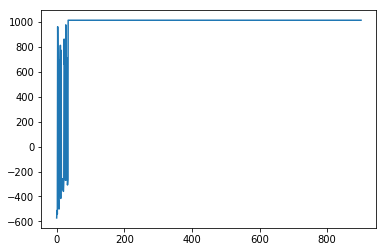

yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes
yyes


In [10]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i % 100 == 0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        

In [8]:
def play(env, agent, t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    r = 0
    #env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getPolicy(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        print (r)
        
        #agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
    return total_reward

In [11]:
agent.Actions

((0, 0),
 (0, 0.07853981633974483),
 (0, -0.07853981633974483),
 (0, 0.15707963267948966),
 (0, -0.15707963267948966),
 (0, 0.23561944901923448),
 (0, -0.23561944901923448),
 (0, 0.3141592653589793),
 (0, -0.3141592653589793),
 (0, 0.39269908169872414),
 (0, -0.39269908169872414),
 (0, 0.47123889803846897),
 (0, -0.47123889803846897),
 (0, 0.5497787143782138),
 (0, -0.5497787143782138),
 (0, 0.6283185307179586),
 (0, -0.6283185307179586),
 (0, 0.7068583470577035),
 (0, -0.7068583470577035),
 (0, 0.7853981633974483),
 (0, -0.7853981633974483),
 (0, 0.8639379797371931),
 (0, -0.8639379797371931),
 (0, 0.9424777960769379),
 (0, -0.9424777960769379),
 (0, 1.0210176124166828),
 (0, -1.0210176124166828),
 (0, 1.0995574287564276),
 (0, -1.0995574287564276),
 (0, 1.1780972450961724),
 (0, -1.1780972450961724),
 (0, 1.2566370614359172),
 (0, -1.2566370614359172),
 (0, 1.335176877775662),
 (0, -1.335176877775662),
 (0, 1.413716694115407),
 (0, -1.413716694115407),
 (0, 1.4922565104551517),
 (0, 